# Korean Semantic Textual Similarity

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
language = "Korean"
train = pd.read_csv("train.csv", sep="\t")
test = pd.read_csv("test.csv", sep="\t")

Let's see what are the rows in train and test datasets

In [4]:
train[:10]

,id,sentence_1,sentence_2,similarity
0,1,비행기가 이륙하고 있다.,비행기가 이륙하고 있다.,5.00
1,4,한 남자가 큰 플루트를 연주하고 있다.,남자가 플루트를 연주하고 있다.,3.80
2,5,한 남자가 피자에 치즈를 뿌려놓고 있다.,한 남자가 구운 피자에 치즈 조각을 뿌려놓고 있다.,3.80
3,6,세 남자가 체스를 하고 있다.,두 남자가 체스를 하고 있다.,2.60
4,9,한 남자가 첼로를 연주하고 있다.,자리에 앉은 남자가 첼로를 연주하고 있다.,4.25
5,11,몇몇 남자들이 싸우고 있다.,두 남자가 싸우고 있다.,4.25
6,12,남자가 담배를 피우고 있다.,남자가 스케이트를 타고 있다.,0.50
7,13,남자가 피아노를 치고 있다.,남자가 기타를 연주하고 있다.,1.60
8,14,한 남자가 기타를 치고 노래를 부르고 있다.,한 여성이 어쿠스틱 기타를 연주하고 노래를 부르고 있다.,2.20
9,16,사람이 고양이를 천장에 던지고 있다.,사람이 고양이를 천장에 던진다.,5.00


In [5]:
train.describe()

,id,similarity
count,5749.000000,5749.000000
mean,437.072186,2.700999
std,328.238438,1.464398
min,0.000000,0.000000
25%,185.000000,1.500000
50%,378.000000,3.000000
75%,616.000000,3.800000
max,1499.000000,5.000000


In [6]:
test[:10]

,id,sentence_1,sentence_2,similarity
0,24,한 소녀가 머리를 스타일링하고 있다.,한 소녀가 머리를 빗고 있다.,2.500
1,33,한 무리의 남자들이 해변에서 축구를 한다.,한 무리의 소년들이 해변에서 축구를 하고 있다.,3.600
2,45,한 여성이 다른 여성의 발목을 재고 있다.,한 여자는 다른 여자의 발목을 측정한다.,5.000
3,63,한 남자가 오이를 자르고 있다.,한 남자가 오이를 자르고 있다.,4.200
4,66,한 남자가 하프를 연주하고 있다.,한 남자가 키보드를 연주하고 있다.,1.500
5,74,한 여자가 양파를 자르고 있다.,한 여자가 두부를 자르고 있다.,1.800
6,76,한 남자가 전기 자전거를 타고 있다.,한 남자가 자전거를 타고 있다.,3.500
7,82,한 남자가 드럼을 치고 있다.,남자가 기타를 치고 있다.,2.200
8,92,한 남자가 기타를 치고 있다.,한 여성이 기타를 연주하고 있다.,2.200
9,95,한 남자가 기타를 치고 있다.,한 남자가 트럼펫을 연주하고 있다.,1.714


In [7]:
def convert(row):
    if row['similarity'] <= 1.0:
        return '0-1'
    elif 1.0 < row['similarity'] <= 2.0:
        return '1-2'
    elif 2.0 < row['similarity'] <= 3.0:
        return '2-3'
    elif 3.0 < row['similarity'] <= 4.0:
        return '3-4'
    else:
        return '4-5'

train['category'] = train.apply(convert, axis=1)
test['category'] = test.apply(convert, axis=1)

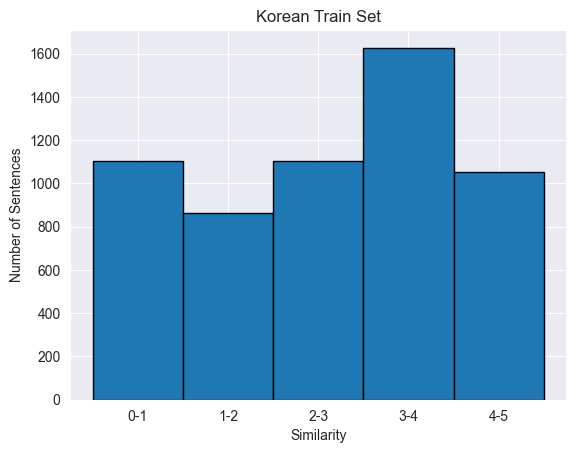

In [8]:
train.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Train Set")
plt.show()

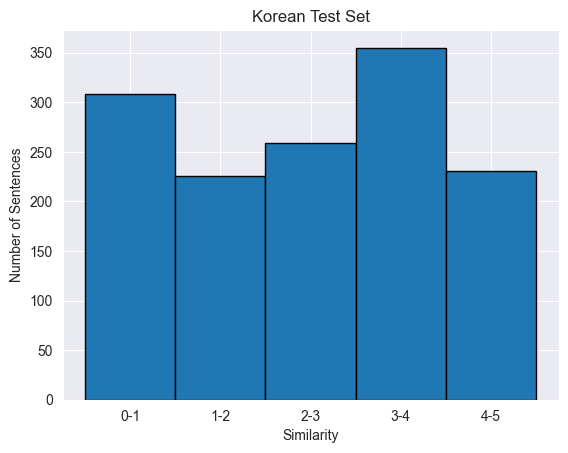

In [9]:
test.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Test Set")
plt.show()

In [10]:
def normalized_word_Common(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1.0* len(w1 & w2)

def normalized_word_Total(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1* (len(w1) + len(w2))

def normalized_word_share(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1.0*len(w1 & w2) / (len(w1) + len(w2))

def prepare_frequencies(df, id_column, column_1, column_2):
    df['freq_1'] = df.groupby(id_column)[id_column].transform('count')
    df['freq_2'] = df.groupby(id_column)[id_column].transform('count')
    df['s1len'] = df[column_1].str.len()
    df['s2len'] = df[column_2].str.len()
    df['s1_n_words'] = df[column_1].apply(lambda row :len(row.split(" ")))
    df['s2_n_words'] = df[column_2].apply(lambda row :len(row.split(" ")))

    df['word_Common'] = df.apply(normalized_word_Common, args=(column_1,column_2), axis=1)
    df['word_Total'] = df.apply(normalized_word_Total, args=(column_1,column_2), axis = 1)
    df['word_share'] = df.apply(normalized_word_share, args=(column_1,column_2), axis = 1)

    df['freq_s1+s2'] = df['freq_1'] + df['freq_2']
    df['freq_s1-s2'] = abs(df['freq_1'] - df['freq_2'])

    return df


In [11]:
train = prepare_frequencies(train, "id", "sentence_1", "sentence_2")
test = prepare_frequencies(test, "id", "sentence_1", "sentence_2")

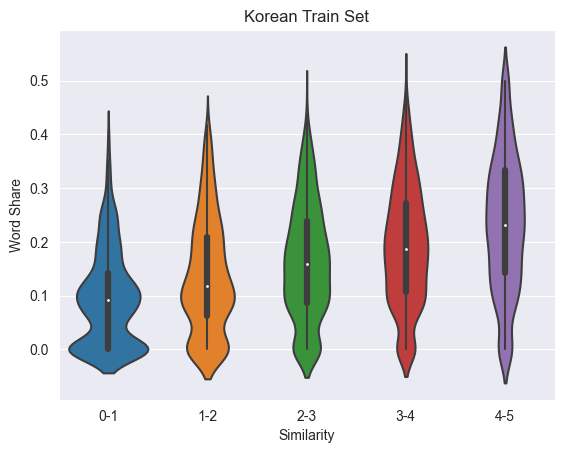

In [12]:
ax = sns.violinplot(x = 'category', y='word_share', data = train[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Train Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

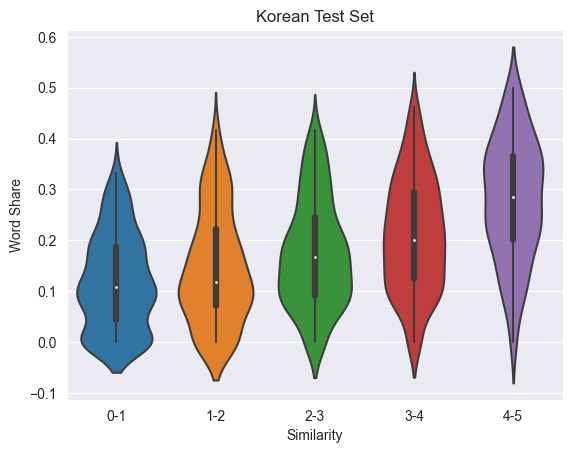

In [13]:
ax = sns.violinplot(x = 'category', y='word_share', data = test[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Test Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

In [14]:
train[:10]

,id,sentence_1,sentence_2,similarity,category,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
0,1,비행기가 이륙하고 있다.,비행기가 이륙하고 있다.,5.00,4-5,6,6,13,13,3,3,3.0,6,0.500000,12,0
1,4,한 남자가 큰 플루트를 연주하고 있다.,남자가 플루트를 연주하고 있다.,3.80,3-4,10,10,21,17,6,4,4.0,10,0.400000,20,0
2,5,한 남자가 피자에 치즈를 뿌려놓고 있다.,한 남자가 구운 피자에 치즈 조각을 뿌려놓고 있다.,3.80,3-4,6,6,22,28,6,8,5.0,14,0.357143,12,0
3,6,세 남자가 체스를 하고 있다.,두 남자가 체스를 하고 있다.,2.60,2-3,8,8,16,16,5,5,4.0,10,0.400000,16,0
4,9,한 남자가 첼로를 연주하고 있다.,자리에 앉은 남자가 첼로를 연주하고 있다.,4.25,4-5,7,7,18,23,5,6,4.0,11,0.363636,14,0
5,11,몇몇 남자들이 싸우고 있다.,두 남자가 싸우고 있다.,4.25,4-5,9,9,15,13,4,4,2.0,8,0.250000,18,0
6,12,남자가 담배를 피우고 있다.,남자가 스케이트를 타고 있다.,0.50,0-1,9,9,15,16,4,4,2.0,8,0.250000,18,0
7,13,남자가 피아노를 치고 있다.,남자가 기타를 연주하고 있다.,1.60,1-2,9,9,15,16,4,4,2.0,8,0.250000,18,0
8,14,한 남자가 기타를 치고 노래를 부르고 있다.,한 여성이 어쿠스틱 기타를 연주하고 노래를 부르고 있다.,2.20,2-3,7,7,24,31,7,8,5.0,15,0.333333,14,0
9,16,사람이 고양이를 천장에 던지고 있다.,사람이 고양이를 천장에 던진다.,5.00,4-5,5,5,20,17,5,4,3.0,9,0.333333,10,0


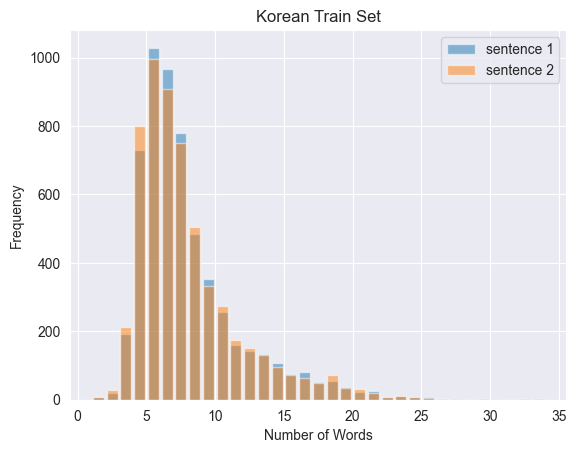

In [15]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(train['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(train['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Train Set")
plt.legend()
plt.show()

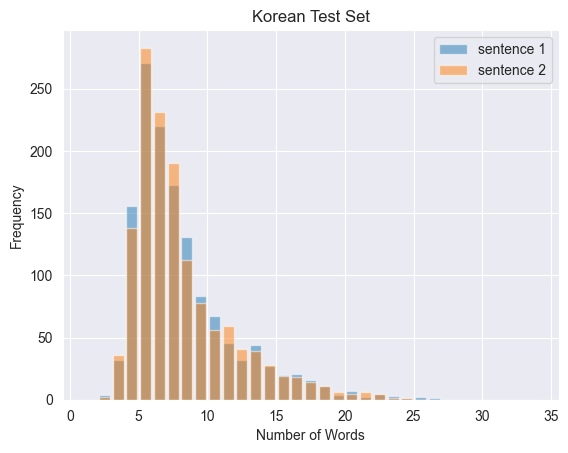

In [16]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(test['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(test['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Test Set")
plt.legend()
plt.show()

In [17]:
train.describe()

,id,similarity,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,5749.000000,5749.000000,5749.000000,5749.000000,5749.000000,5749.000000,5749.000000,5749.000000,5749.000000,5749.000000,5749.000000,5749.000000,5749.0
mean,437.072186,2.700999,6.563402,6.563402,29.848843,29.759958,7.530353,7.472952,2.593147,14.909028,0.166951,13.126805,0.0
std,328.238438,1.464398,2.397594,2.397594,16.799410,16.723148,3.853122,3.834862,2.428496,7.154248,0.117536,4.795189,0.0
min,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.0
25%,185.000000,1.500000,5.000000,5.000000,19.000000,18.000000,5.000000,5.000000,1.000000,10.000000,0.083333,10.000000,0.0
50%,378.000000,3.000000,7.000000,7.000000,25.000000,25.000000,6.000000,6.000000,2.000000,13.000000,0.153846,14.000000,0.0
75%,616.000000,3.800000,8.000000,8.000000,35.000000,35.000000,9.000000,9.000000,4.000000,17.000000,0.250000,16.000000,0.0
max,1499.000000,5.000000,11.000000,11.000000,150.000000,140.000000,33.000000,32.000000,19.000000,58.000000,0.500000,22.000000,0.0


In [18]:
test.describe()

,id,similarity,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.0
mean,495.699057,2.607917,2.139956,2.139956,29.496012,29.247281,7.659173,7.613488,2.788252,15.142857,0.184369,4.279913,0.0
std,368.229042,1.525517,1.058516,1.058516,16.418880,16.020050,3.760212,3.648666,2.327686,6.845001,0.120414,2.117032,0.0
min,0.000000,0.000000,1.000000,1.000000,6.000000,8.000000,2.000000,2.000000,0.000000,4.000000,0.000000,2.000000,0.0
25%,199.500000,1.315000,1.000000,1.000000,18.000000,18.000000,5.000000,5.000000,1.000000,10.000000,0.090909,2.000000,0.0
50%,431.000000,2.800000,2.000000,2.000000,24.000000,24.000000,7.000000,6.000000,2.000000,13.000000,0.173913,4.000000,0.0
75%,684.000000,3.800000,3.000000,3.000000,35.000000,34.000000,9.000000,9.000000,4.000000,18.000000,0.272727,6.000000,0.0
max,1568.000000,5.000000,5.000000,5.000000,99.000000,100.000000,26.000000,24.000000,16.000000,47.000000,0.500000,10.000000,0.0
